<a href="https://colab.research.google.com/github/ExtraMediumDev/Gradient-Boosting-Benchmark/blob/main/Gradient_Boosting_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/cs361-illinois/final-project

Cloning into 'final-project'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 132 (delta 62), reused 126 (delta 59), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 110.77 KiB | 1.65 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [ ]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#print('Not implemented.')

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
theta_pred = theta_pred = la.inv(A.T @ A) @ (A.T @ y_data) # TODO: Implement the analytical solution

print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [0.99659188 0.99965867 1.00311618 1.00007123 0.99589383 1.00355094
 1.01154801 1.0059724  0.9998866  0.99760908]


In [ ]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [ ]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0

    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_

        #print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''


        l = np.abs(err)**deg_

        grad = deg_ * np.sign(err) * (np.abs(err)**(deg_-1)) * x_

        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]

    return loss, gradient

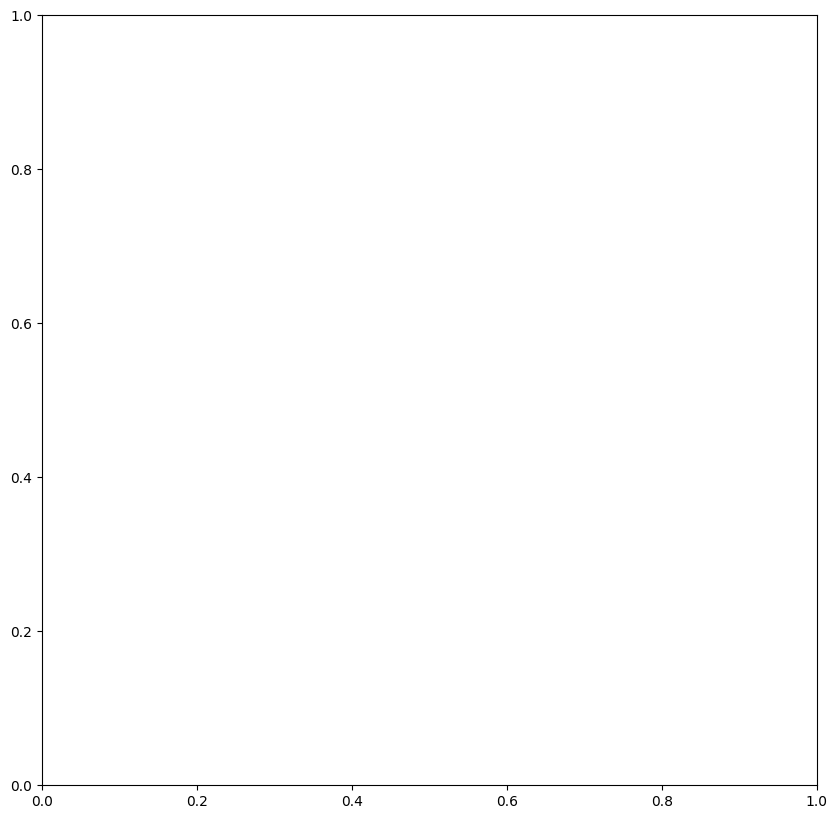

In [ ]:


#@title Parameters
deg_ = 2 #@param {type: "number"}
num_rep = 100 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}






adam done
adam final θ: [0.3232198  0.3633971  0.31540666 0.34316386 0.31330559 0.31511877
 0.35552215 0.34109513 0.36864036 0.32433905]





sgd done
sgd final θ: [0.18483096 0.24193499 0.24008504 0.22202716 0.17293552 0.17250285
 0.18825745 0.22113896 0.22483716 0.2383387 ]





adagrad done
adagrad final θ: [0.05811013 0.09616723 0.09357368 0.08185669 0.02238789 0.02093504
 0.07310767 0.08654812 0.06028707 0.08739312]


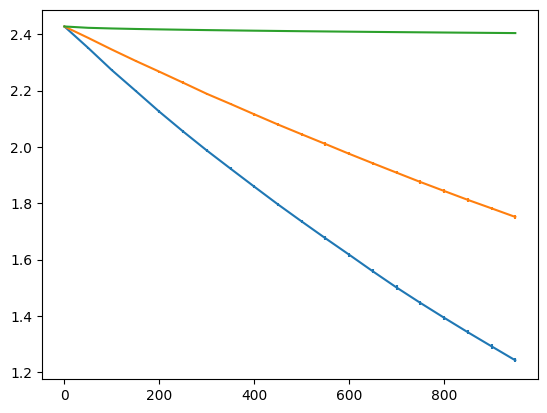

In [ ]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []

    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print()

        if method == 'adam':
            alpha = 0.001
            beta_1, beta_2 = 0.9, 0.999
            epsilon = 1e-8
            m = np.zeros_like(theta_init)  # <-- implemented Adam 1st moment init
            v = np.zeros_like(theta_init)

        if method == 'adagrad':
            #print('Adagrad Not implemented.')

            epsilon = 1e-8
            squared_sum = np.zeros_like(theta_init)

        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)

            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)

            if method == 'adam':
                #print('Adam Not implemented.') # TODO: Implement Adam
                t += 1  # timestep
                m  = beta_1*m  + (1-beta_1)*gradient              # <-- implemented m_t update
                v  = beta_2*v  + (1-beta_2)*(gradient**2)         # <-- implemented v_t update
                m_hat = m  / (1 - beta_1**t)                      # <-- implemented bias-corrected m
                v_hat = v  / (1 - beta_2**t)                      # <-- implemented bias-corrected v
                theta_hat = theta_hat - alpha*m_hat/(np.sqrt(v_hat)+epsilon)

            elif method == 'adagrad':
                #print('Adagrad Not implemented.')
                squared_sum += gradient**2                        # <-- implemented accumulator update
                theta_hat     = theta_hat - lr*gradient/(np.sqrt(squared_sum)+epsilon)

            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient

        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)

    print(method, 'done')
    print(f"{method} final θ: {theta_hat.flatten()}")
    x_axis = np.arange(max_iter)[::test_exp_interval]

    #print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    #print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)

    #print('Not implemented.')
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0)    # TODO: Calculate the mean test loss

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se   = np.std(test_loss_np, axis=0, ddof=1)/np.sqrt(test_loss_np.shape[0])# TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

In [ ]:
!git clone https://github.com/cs361-illinois/final-project

Cloning into 'final-project'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 132 (delta 62), reused 126 (delta 59), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 110.77 KiB | 4.82 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn
from torch import optim

In [ ]:
mini_batch_size = 64

In [ ]:
### Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

### Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=mini_batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=mini_batch_size, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


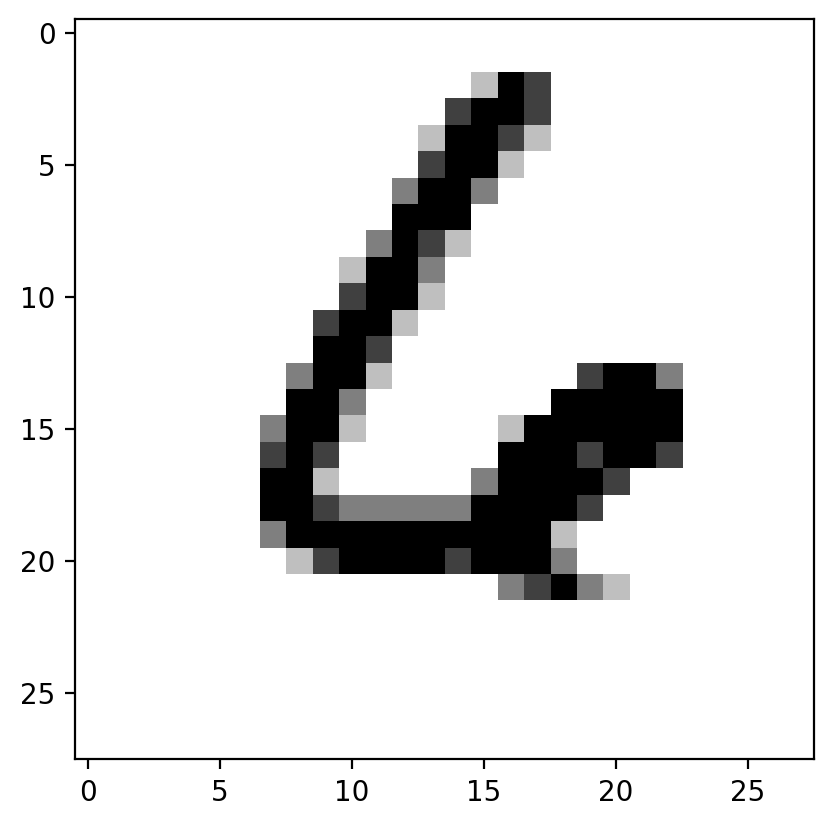

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

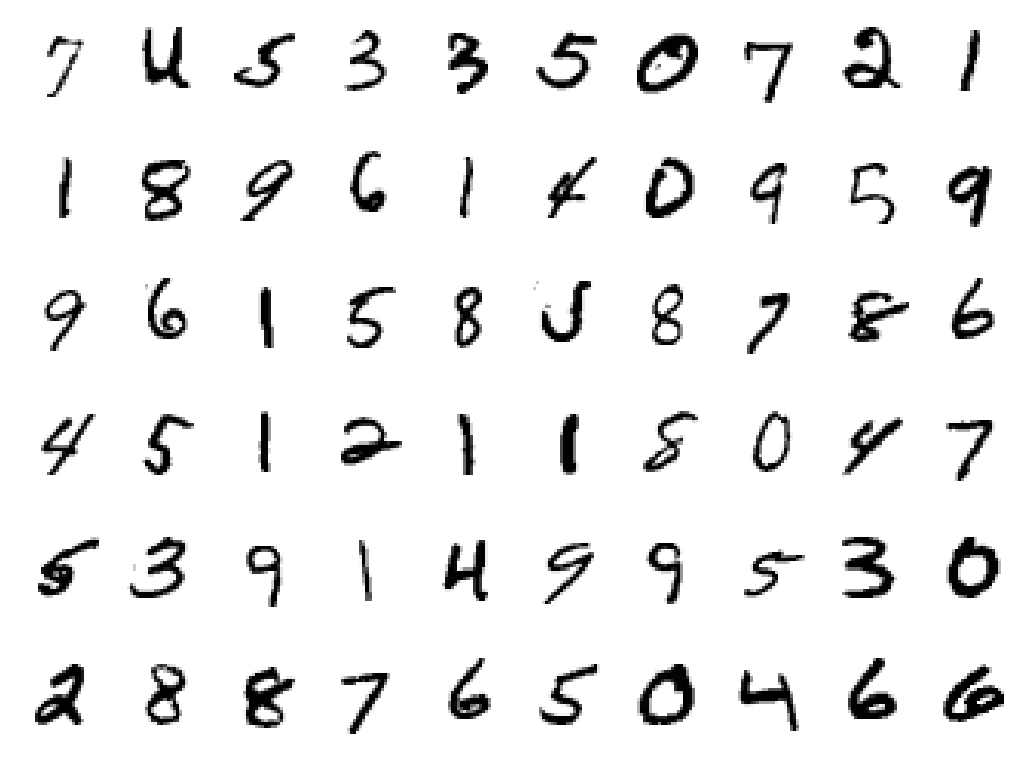

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]), # Fully Connected Layer
    nn.ReLU(), # Activation
    nn.Linear(hidden_sizes[0], hidden_sizes[1]), # Fully Connected Layer
    nn.ReLU(), # Activation
    nn.Linear(hidden_sizes[1], output_size), # Fully Connected Layer
    nn.LogSoftmax(dim=1) # (Log) Softmax Layer: Output a probability distribution and apply log
)
print(model)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
lr = 3e-3 #@param {type: "number"}
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
time0 = time()
epochs = 15
criterion = nn.NLLLoss() # Negative log likelihood loss function is used
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1).to(device)

logps = model(images) # Model spits out the log probability of image belonging to different classes
loss = criterion(logps, labels.to(device))

In [ ]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()

        output = model(images).to(device)
        loss = criterion(output, labels)

        # backpropagation: calculate the gradient of the loss function w.r.t model parameters
        loss.backward()

        # And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =", (time()-time0)/60)



Epoch 0 - Training loss: 0.3408058645533346
Epoch 1 - Training loss: 0.1749747529296256
Epoch 2 - Training loss: 0.14055820913917855
Epoch 3 - Training loss: 0.12899864151644935
Epoch 4 - Training loss: 0.1118252472837827
Epoch 5 - Training loss: 0.10849785532848016
Epoch 6 - Training loss: 0.09800996270446755
Epoch 7 - Training loss: 0.09259571925911214
Epoch 8 - Training loss: 0.0889024098636086
Epoch 9 - Training loss: 0.08528899684893901
Epoch 10 - Training loss: 0.07947858781325443
Epoch 11 - Training loss: 0.07595886333114796
Epoch 12 - Training loss: 0.07321294066027056
Epoch 13 - Training loss: 0.07012793400398354
Epoch 14 - Training loss: 0.06948339785270488

Training Time (in minutes) = 4.776306883494059


In [ ]:
model.eval()

correct, total = 0, 0
with torch.no_grad():
    for images, labels in valloader:

        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        logps = model(images)
        preds = logps.argmax(dim=1)

        total   += labels.size(0)
        correct += (preds == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.04%


In [ ]:
def view_classify(img, ps):
    """ Function for viewing an image and it's predicted classes."""
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 6


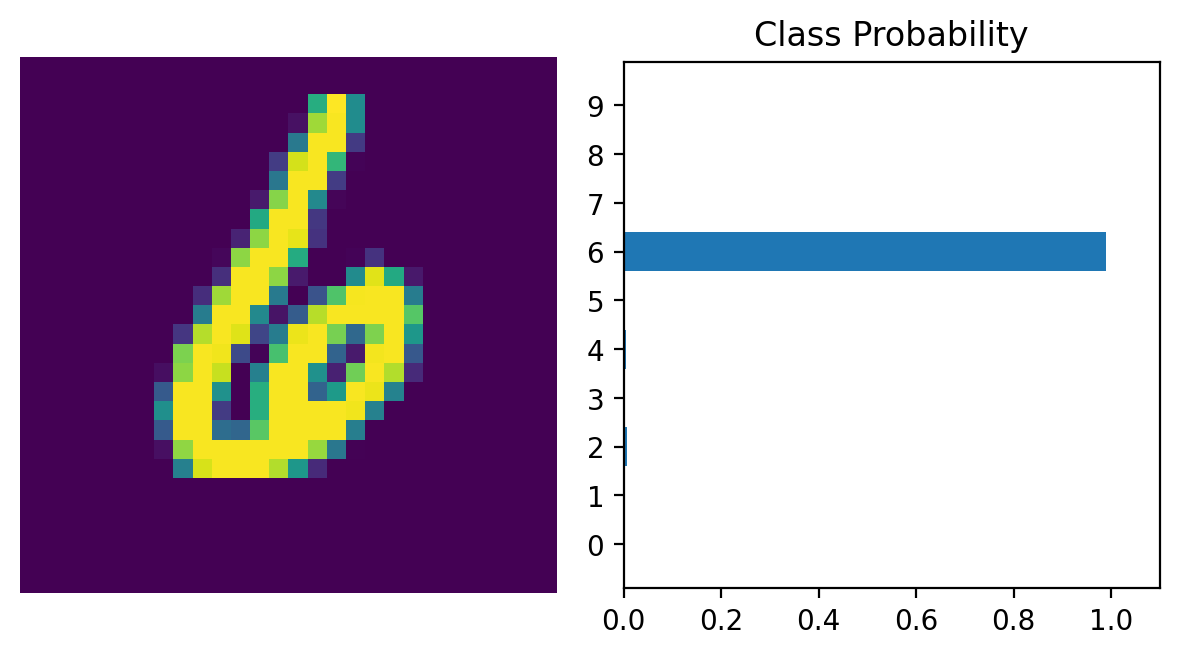

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784).to(device)
# Turn off gradients
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.cpu().view(1, 28, 28), ps.cpu())

Closed‑form θ*: [0.9933146  1.00257343 0.99951324 0.99798517 0.99337347 1.0040343
 0.99239064 1.00109499 0.99590401 0.99141983]


<ipython-input-104-ad9b60cda27b>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err = float(x_i.T @ theta) - float(y[i])


ADAGRAD  | final θ (last rep): [0.21665156 0.11990475 0.18194787 0.22758805 0.20976697 0.21667736
 0.11977074 0.19204921 0.17297891 0.21661079]
RMSPROP  | final θ (last rep): [0.2365114  0.19610811 0.21464126 0.27491762 0.21963691 0.23196064
 0.20431768 0.11978334 0.27875176 0.26064123]


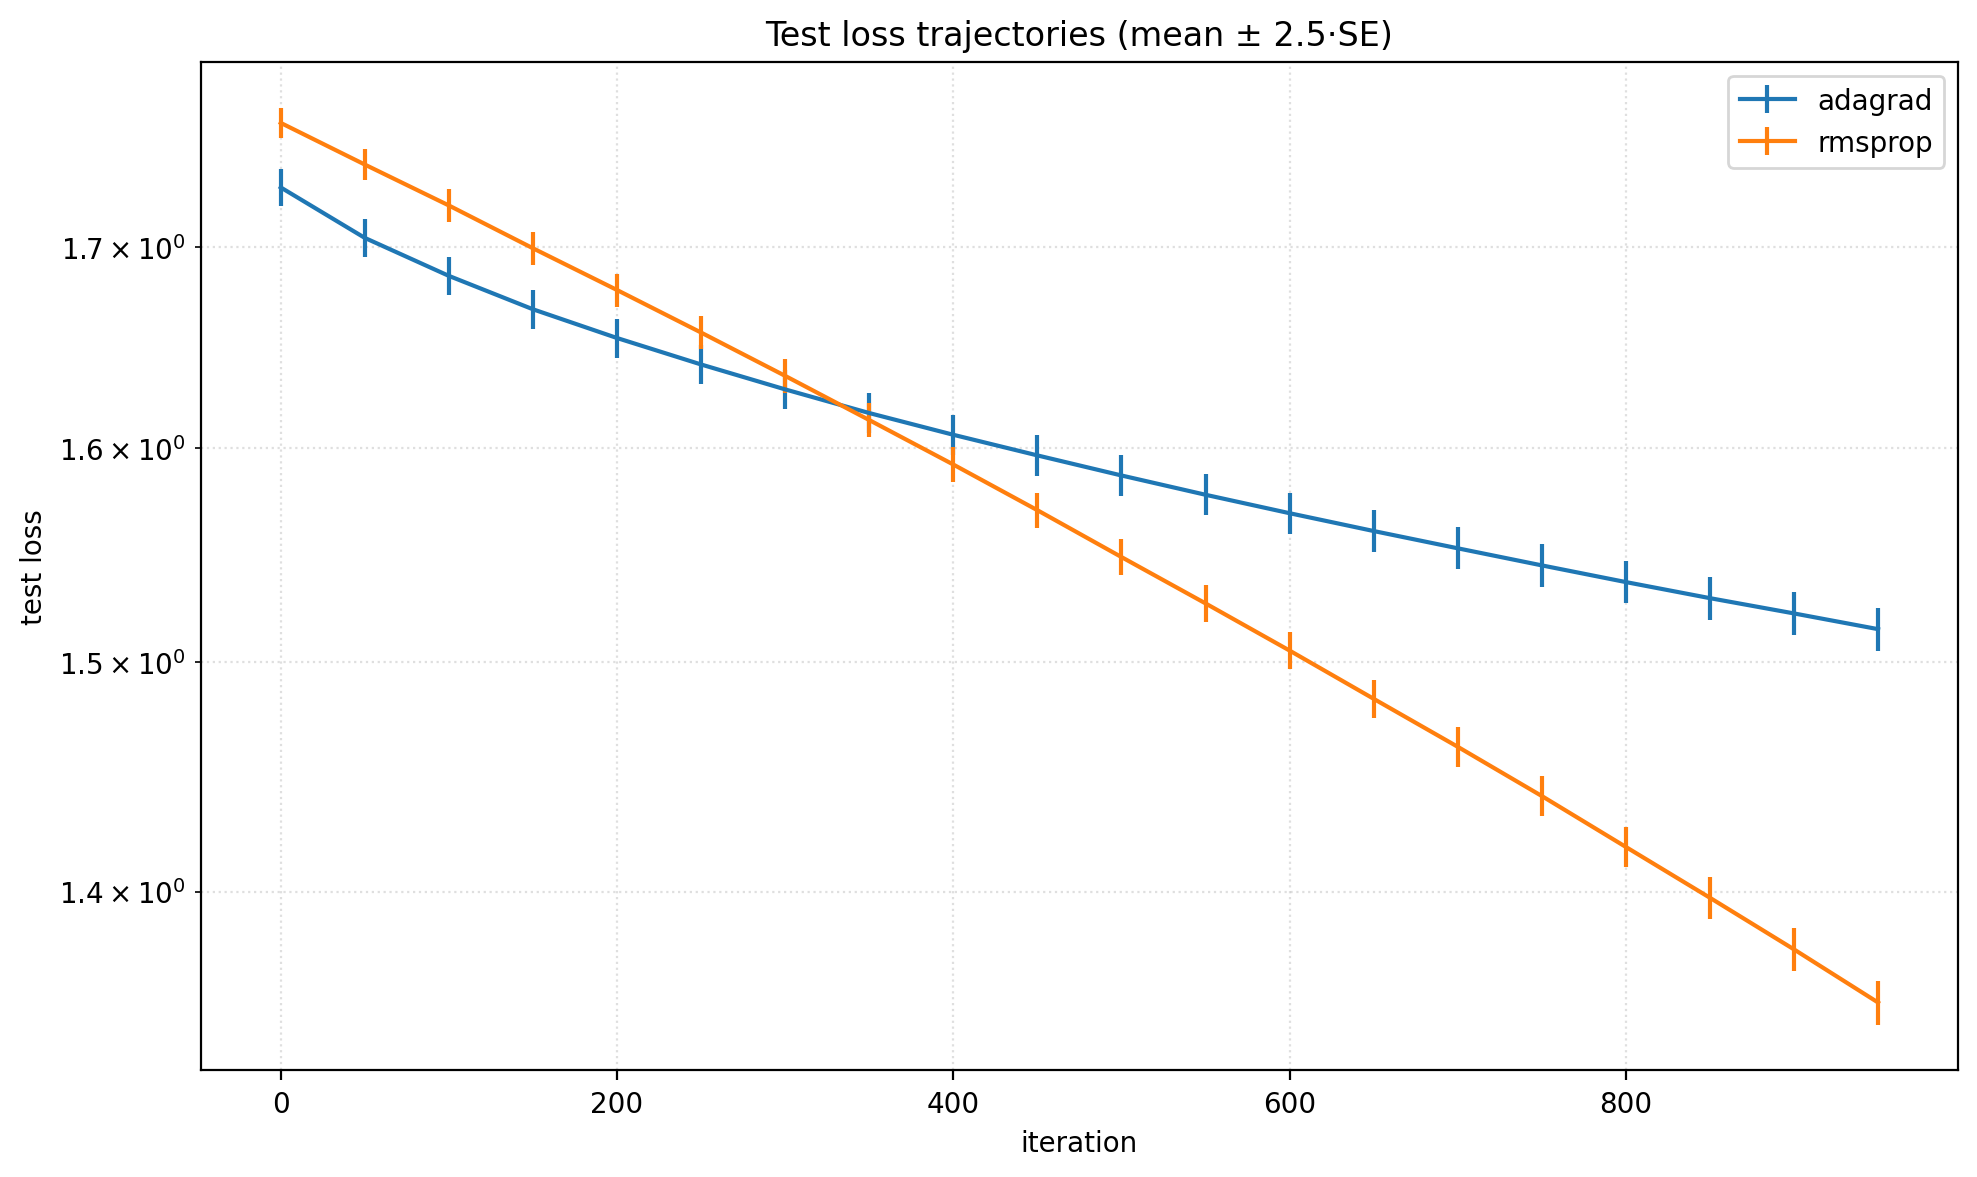

In [ ]:

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

np.random.seed(0)
dim_theta = 10
data_num  = 1000
noise_sd  = 0.1

theta_true = np.ones((dim_theta, 1))
A   = np.random.uniform(-1.0, 1.0, size=(data_num, dim_theta))
y   = A @ theta_true + np.random.normal(0.0, noise_sd, size=(data_num, 1))

A_test = np.random.uniform(-1.0, 1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(0.0, noise_sd, size=(50, 1))


theta_ls = la.inv(A.T @ A) @ (A.T @ y)
print("Closed‑form θ*:", theta_ls.ravel())


def noisy_val_grad(theta, X, y, deg_=2.0):
    """
    Returns (loss, gradient) averaged over the mini‑batch X, y.
    Loss is mean |error|^deg_.  Grad is its derivative wrt theta.
    """
    gradient = np.zeros_like(theta)
    loss = 0.0

    for i in range(X.shape[0]):
        x_i = X[i, :].reshape(-1, 1)
        err = float(x_i.T @ theta) - float(y[i])
        l   = abs(err) ** deg_
        g   = deg_ * np.sign(err) * (abs(err) ** (deg_ - 1)) * x_i

        loss     += l
        gradient += g

    n = X.shape[0]
    return loss / n, gradient / n


batch_size  = 1
max_iter    = 1000
lr_sgd      = 1e-3
lr_adagrad  = 1e-2
lr_rmsprop  = 1e-3
lr_adam     = 1e-3

eps         = 1e-8
rho_rms     = 0.9

num_rep            = 100
test_eval_period   = 50
deg_               = 1

methods = ["adagrad", "rmsprop"]
results = {}

for method in methods:
    test_loss_runs = []

    for rep in range(num_rep):
        # random init in small ball
        theta = np.random.uniform(-0.1, 0.1, size=(dim_theta, 1))

        if method == "adagrad":
            G_accum = np.zeros_like(theta)
        elif method == "rmsprop":
            E_g2 = np.zeros_like(theta)
        elif method == "adam":
            m = np.zeros_like(theta)
            v = np.zeros_like(theta)
            beta1, beta2 = 0.9, 0.999

        test_losses = []

        for t in range(1, max_iter + 1):

            idx       = np.random.choice(data_num, batch_size, replace=False)
            loss, g   = noisy_val_grad(theta, A[idx, :], y[idx, :], deg_=deg_)


            if method == "sgd":
                theta -= lr_sgd * g

            elif method == "adagrad":
                G_accum += g ** 2
                theta   -= lr_adagrad * g / (np.sqrt(G_accum) + eps)

            elif method == "rmsprop":
                E_g2 = rho_rms * E_g2 + (1 - rho_rms) * (g ** 2)
                theta -= lr_rmsprop * g / (np.sqrt(E_g2) + eps)

            elif method == "adam":
                m = beta1 * m + (1 - beta1) * g
                v = beta2 * v + (1 - beta2) * (g ** 2)
                m_hat = m / (1 - beta1 ** t)
                v_hat = v / (1 - beta2 ** t)
                theta -= lr_adam * m_hat / (np.sqrt(v_hat) + eps)


            if t % test_eval_period == 0:
                tloss, _ = noisy_val_grad(theta, A_test, y_test, deg_=deg_)
                test_losses.append(tloss)

        test_loss_runs.append(test_losses)

    results[method] = np.array(test_loss_runs)

    print(f"{method.upper():8s} | final θ (last rep):", theta.ravel())


plt.figure(figsize=(10, 6))
time_axis = np.arange(max_iter // test_eval_period) * test_eval_period

for method in methods:
    arr = results[method]
    mean = arr.mean(axis=0)
    se   = arr.std(axis=0, ddof=1) / np.sqrt(num_rep)
    plt.errorbar(time_axis, mean, yerr=2.5 * se, label=method)

plt.xlabel("iteration")
plt.ylabel("test loss")
plt.yscale("log")
plt.title("Test loss trajectories (mean ± 2.5·SE)")
plt.legend()
plt.grid(True, which="both", ls="dotted", alpha=0.4)
plt.tight_layout()
plt.show()
